<a href="https://colab.research.google.com/github/Harman2607/ML_Scratch/blob/master/MNIST_PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Classification 
Convolutional Neural Networks, using PYTORCH

In [35]:
%%shell
mkdir DATA_STORE
mkdir MODEL_STORE

mkdir: cannot create directory ‘DATA_STORE’: File exists


In [0]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [0]:
# model hyperparameters
batch_size = 100
num_epochs = 5
num_classes = 10
learning_rate = 0.001

# transforms for the datasets
# MNIST is single channeled, for , eg CIFAR dataset , the normalization has to use mean and variance of all three ie Red, Blue and Green
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])

# download the datasets in folders
train_data = torchvision.datasets.MNIST(root ='./DATA_STORE', train = True, transform = trans, download = True)
test_data = torchvision.datasets.MNIST(root = './DATA_STORE', train = False,transform = trans, download = True)

# load into dataloader
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

In [0]:
# our class inherits from the torch.nn.Module class 

# nn.Conv2d(input channels, output channels, Kernel size, stride, padding)
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,stride = 2)
        )
    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64,kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
    self.drop_out = nn.Dropout()
    self.fc1 = nn.Linear(7*7*64,1000)
    self.fc2 = nn.Linear(1000, 10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)    
    out = self.drop_out(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

In [0]:
#  initializing the model
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [33]:
# Training the model
totalsteps = len(train_loader)
losslist = []
accuracylist = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # FORWARD PROP, model(images) automatically calls forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    losslist.append(loss.item())

    # BACK PROP
    # make the gradients zero
    optimizer.zero_grad() 
    # perform the backward propagation and get the gradients
    loss.backward()
    # adam optimizer training step . We use the gradients in this step
    optimizer.step()

    # Accuracy
    # Note we take batch_size amounts of y's at a time
    total = labels.size(0)
    predicted = torch.max(outputs.data,1)[1]
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    accuracylist.append(accuracy)

    # item() is used for getting the scalar from a tensor
    if(i + 1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i+1, totalsteps, loss.item(),(accuracy)*100 ))


Epoch [1/5], Step [100/600], Loss: 0.2053, Accuracy: 94.00%
Epoch [1/5], Step [200/600], Loss: 0.1675, Accuracy: 97.00%
Epoch [1/5], Step [300/600], Loss: 0.1259, Accuracy: 96.00%
Epoch [1/5], Step [400/600], Loss: 0.1478, Accuracy: 93.00%
Epoch [1/5], Step [500/600], Loss: 0.0755, Accuracy: 98.00%
Epoch [1/5], Step [600/600], Loss: 0.1453, Accuracy: 94.00%
Epoch [2/5], Step [100/600], Loss: 0.0894, Accuracy: 98.00%
Epoch [2/5], Step [200/600], Loss: 0.1156, Accuracy: 94.00%
Epoch [2/5], Step [300/600], Loss: 0.0837, Accuracy: 96.00%
Epoch [2/5], Step [400/600], Loss: 0.0441, Accuracy: 99.00%
Epoch [2/5], Step [500/600], Loss: 0.1428, Accuracy: 97.00%
Epoch [2/5], Step [600/600], Loss: 0.0544, Accuracy: 98.00%
Epoch [3/5], Step [100/600], Loss: 0.1074, Accuracy: 95.00%
Epoch [3/5], Step [200/600], Loss: 0.0593, Accuracy: 97.00%
Epoch [3/5], Step [300/600], Loss: 0.0679, Accuracy: 98.00%
Epoch [3/5], Step [400/600], Loss: 0.0253, Accuracy: 99.00%
Epoch [3/5], Step [500/600], Loss: 0.075

In [38]:
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    outputs = model(images)
    predicted = torch.max(outputs.data,1)[1]
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Test Accuracy for 10K test images = {} %'.format((correct/total)*100))

  torch.save(model.state_dict(), './MODEL_STORE/MNIST_conve_nets.ckpt')

Test Accuracy for 10K test images = 99.02 %


GRAPH PLOTS


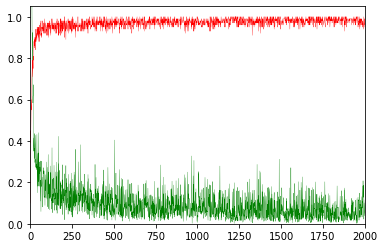

In [58]:
import matplotlib.pyplot as plt
plt.plot(losslist, color = 'green', linewidth = 0.3 )
plt.plot(accuracylist, color = 'red', linewidth = 0.3)
plt.xlim(0,2000)
plt.ylim(0,1.05)
plt.show()


# SOME RANDOM EXPERIMENTS 
Using test data images

taking every 1000th image from the 10k dataset :


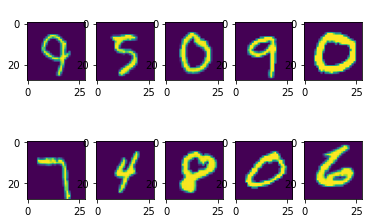

The output predictions by the model are : 
[9. 5. 0. 9. 0. 7. 4. 8. 0. 6.]


In [126]:
import numpy as np
fig = plt.figure()
rows = 2
columns = 5
count1 = 0
count2 = 1
predicted = np.zeros(10)
print('taking every 1000th image from the 10k dataset :')
for i, (images, labels) in enumerate(test_loader):

  for j in range(images.size(0)):
    if((j+1) % 50 ==0):
      if(count2 % 1000 == 0):
        output = model(images)
        predictions = torch.max(output.data,1)[1]
        
        predicted[count1] = predictions[j].item()
        a = fig.add_subplot(rows, columns, count1+1)
        a.set_title(labels[j].item(), color ='white')
        plt.imshow(np.array(images[j]).reshape((28,28)))
        count1+=1

    count2+=1
plt.show()
print('The output predictions by the model are : ')
print(predicted)
